In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_dir = '/home/khoahd/bci-competition/data'
file_path = os.path.join(data_dir, 'filtered_subjects_with_age.tsv')
data = pd.read_csv(file_path, sep='\t')

def extract_group(participant_id):
    return participant_id.split('-')[1][:2]

data['group'] = data['participant_id'].apply(extract_group)

train_set = pd.DataFrame(columns=data.columns)
test_set = pd.DataFrame(columns=data.columns)

for group in data['group'].unique():
    group_data = data[data['group'] == group]
    train, test = train_test_split(group_data, test_size=0.2, random_state=42)
    train_set = pd.concat([train_set, train])
    test_set = pd.concat([test_set, test])

train_set = train_set.drop(columns=['group'])
test_set = test_set.drop(columns=['group'])

train_set.to_csv(os.path.join(data_dir, 'train_set.csv'), sep='\t', index=False)
test_set.to_csv(os.path.join(data_dir, 'test_set.csv'), sep='\t', index=False)

print("Train and test sets have been created and saved.")

Train and test sets have been created and saved.


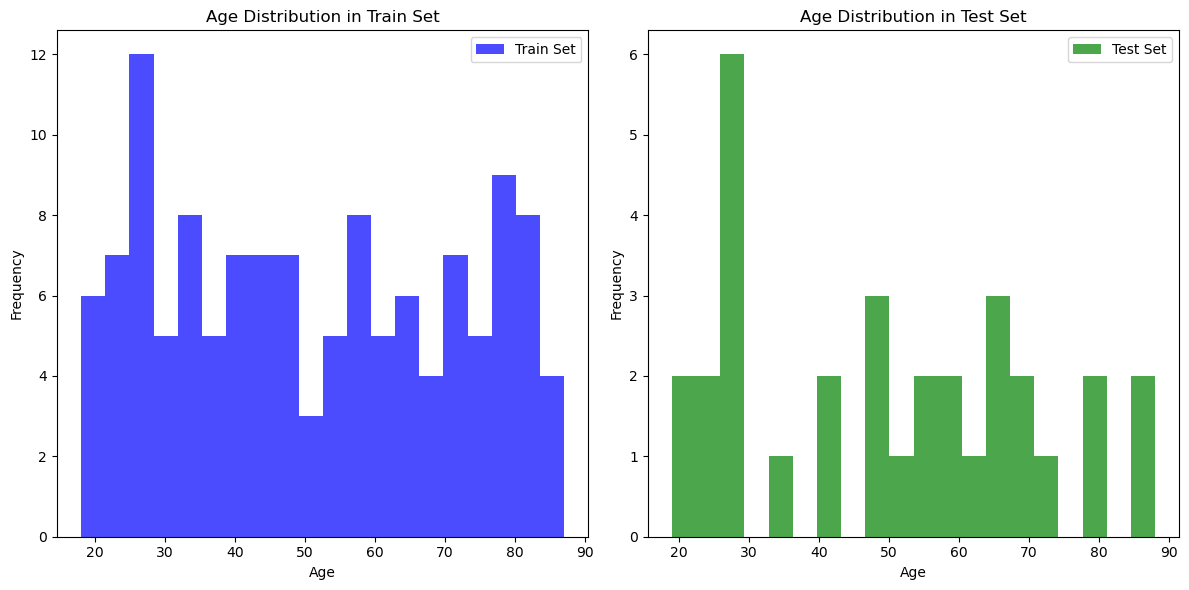

In [2]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_set['age'], bins=20, color='blue', alpha=0.7, label='Train Set')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in Train Set')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(test_set['age'], bins=20, color='green', alpha=0.7, label='Test Set')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in Test Set')
plt.legend()

plt.tight_layout()
plt.show()
